# DESARROLLO CASO PRACTICO 2
##### Se pretende aprender el tipo de cáncer de mama (maligno=1, benigno=0) utilizando los algoritmos de clasificación revisados en la unidad 2, así como realizar la evaluación del rendimiento de los algoritmos  usando las métricas y gráficas respectivas.

###  Analisis de Datos- Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada
#### Integrantes : Victoria Fárez | Wilfrido Almache | Christian Iza | Ruben Tocain


## 1. Instalar librerías requeridas

In [1]:
#Importar librerias necesarias
%pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2. Importar librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

import joblib


## 3. Importar Datos

In [3]:
# Cargar el dataset
url = "data/data.csv"
data = pd.read_csv(url)
# Mostrar las primeras filas del dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## 4. Preprocesamiento de Datos

In [4]:
# Sustituir 'M' por 1 y 'B' por 0 en la columna de Diagnosis
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
# Descartar la columna de ID
data.drop(columns=['id'], inplace=True)
# Verificar valores perdidos
print(data.isnull().sum())
#print(data['diagnosis'])

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

## 5. Análisis Exploratorio de Datos (EDA)

In [5]:
# Estadísticas descriptivas
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

### 5.1. Gráfico de barras para categorizar Malignos y Benignos

Valores Exactos de Diagnósticos: Benigno vs Maligno
diagnosis
0    357
1    212
Name: count, dtype: int64


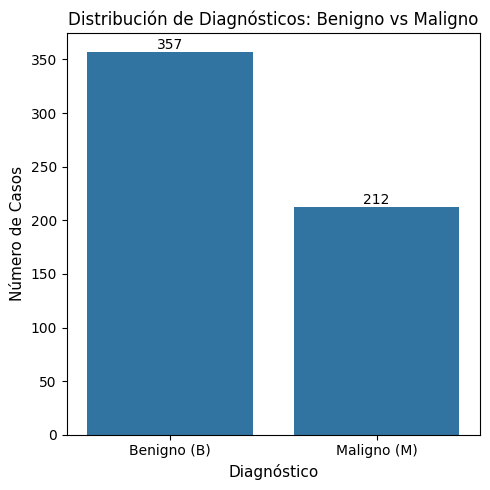

In [6]:
# Contar los casos benignos y malignos
diagnosis_counts = data['diagnosis'].value_counts()
# Imprimir los valores exactos en consola
print("Valores Exactos de Diagnósticos: Benigno vs Maligno")
print(diagnosis_counts)
# Crear el gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
# Personalizar el gráfico
plt.title('Distribución de Diagnósticos: Benigno vs Maligno', fontsize=12)
plt.xlabel('Diagnóstico', fontsize=11)
plt.ylabel('Número de Casos', fontsize=11)
plt.xticks([0, 1], ['Benigno (B)', 'Maligno (M)'], fontsize=10)
# Añadir etiquetas de valor en las barras
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontsize=10)
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### 5.2. Correlación de todas las características

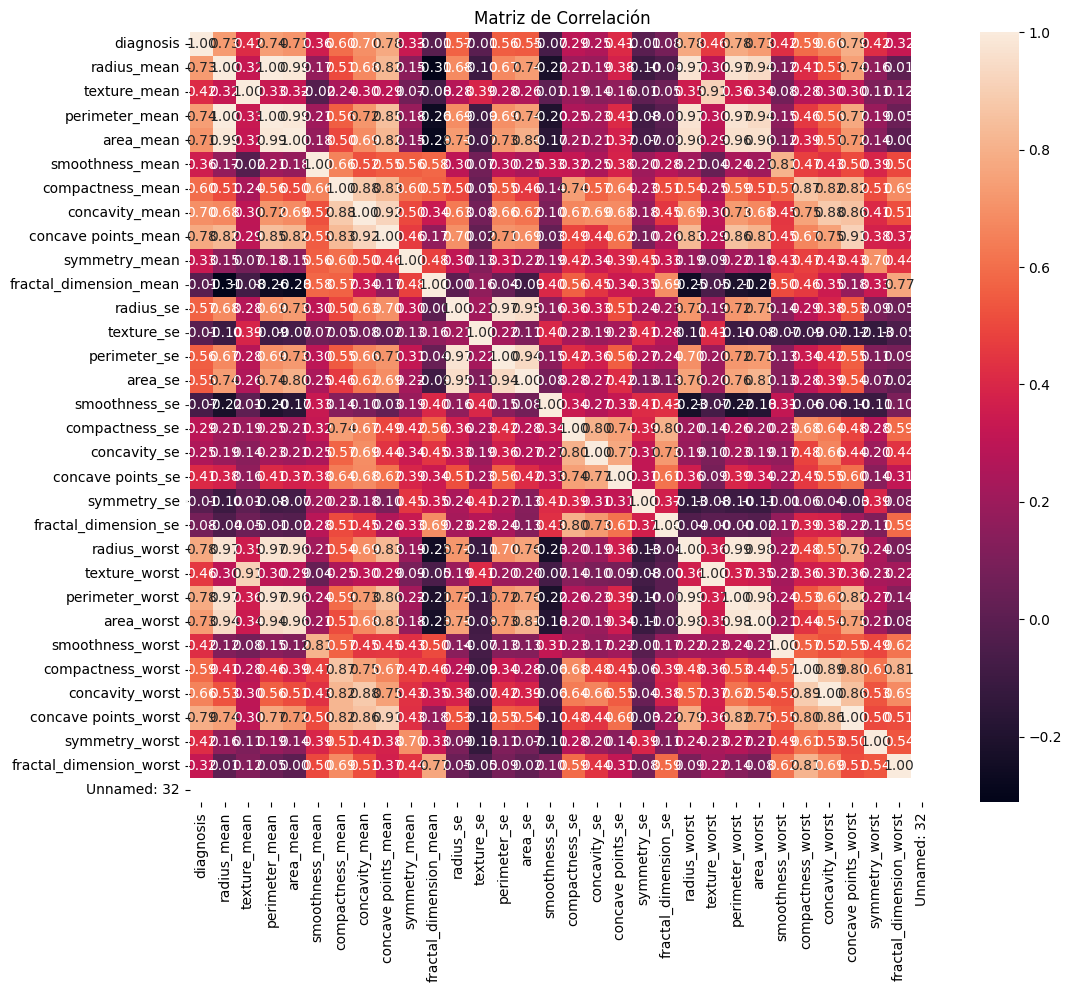

In [7]:
# Matriz de correlación de las características
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 5.3. Selección de variables relevantes / diagrama de caja o gráfico de caja y bigotes

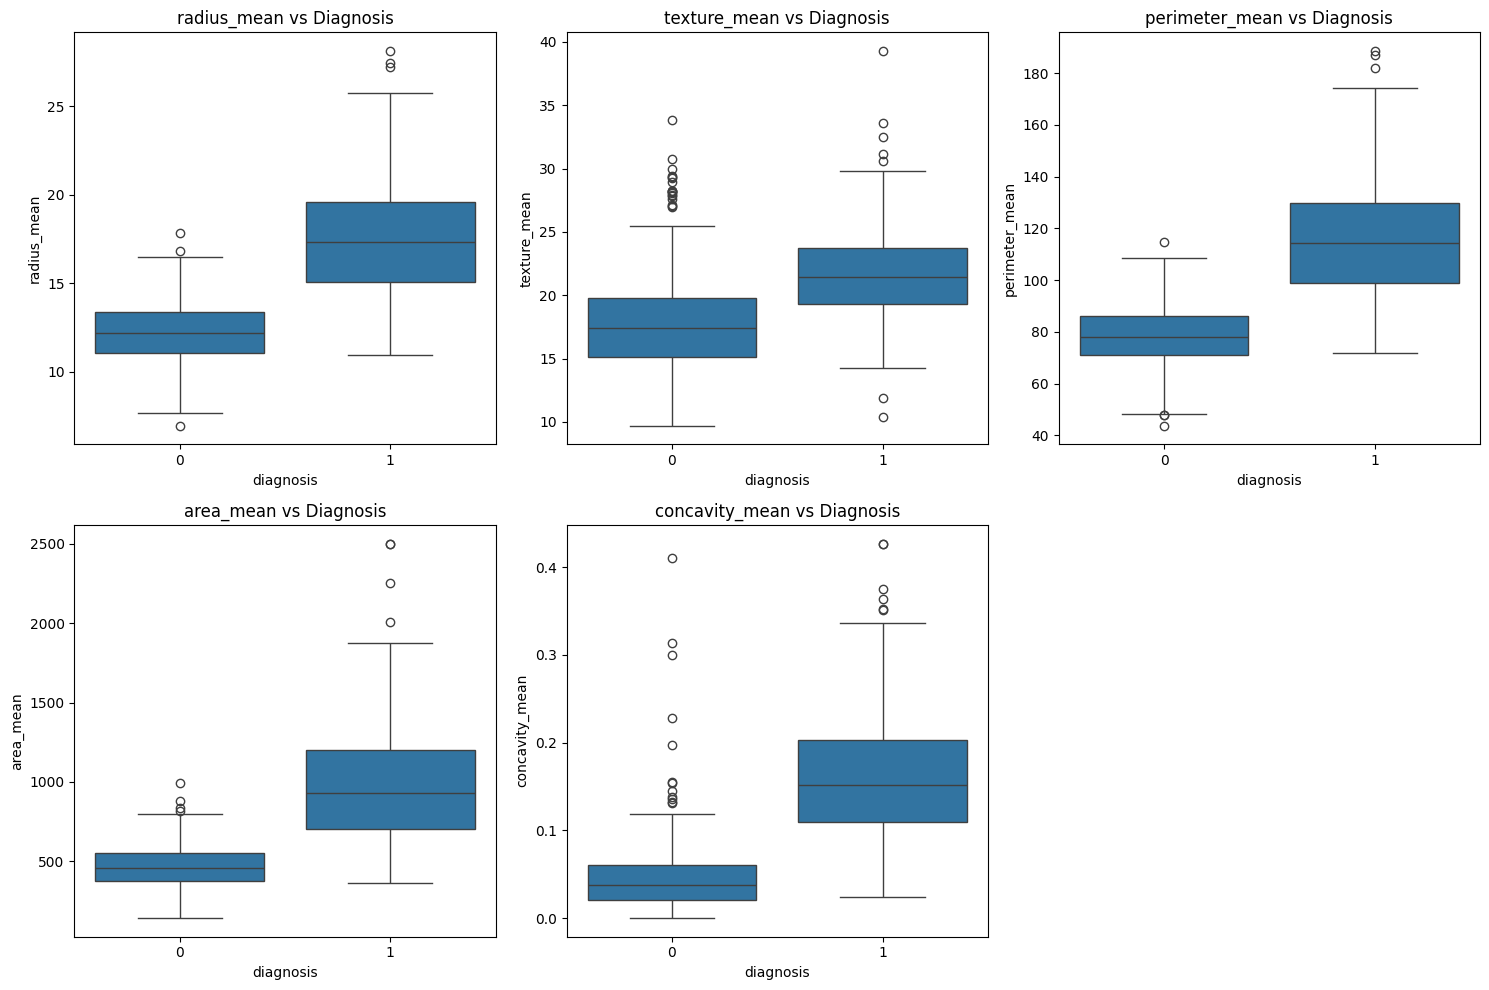

In [8]:
# Seleccionar variables relevantes para visualización
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
# Diagrama de caja o gráfico de caja y bigotes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
#plt.savefig('boxplots_features.png')
plt.show()
plt.close()

### 5.4. Correlación ajustada a parametros más importantes

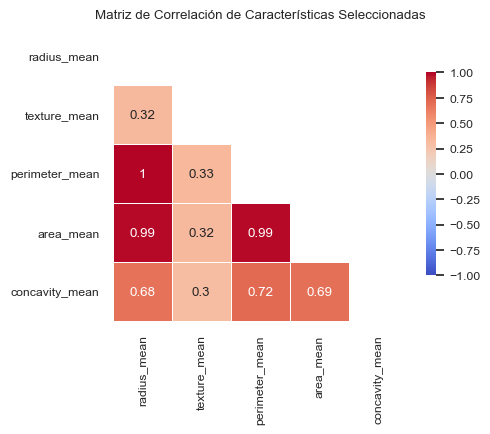

In [9]:
# Crear la matriz de correlación
corr = data[features].corr()
# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configurar el estilo de seaborn
sns.set(style="white", font_scale=0.8)
# Crear la figura
plt.figure(figsize=(5, 5))
# Crear el heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de Correlación de Características Seleccionadas")
plt.tight_layout()
plt.show()

### 5.5. Quitar valores atipicos

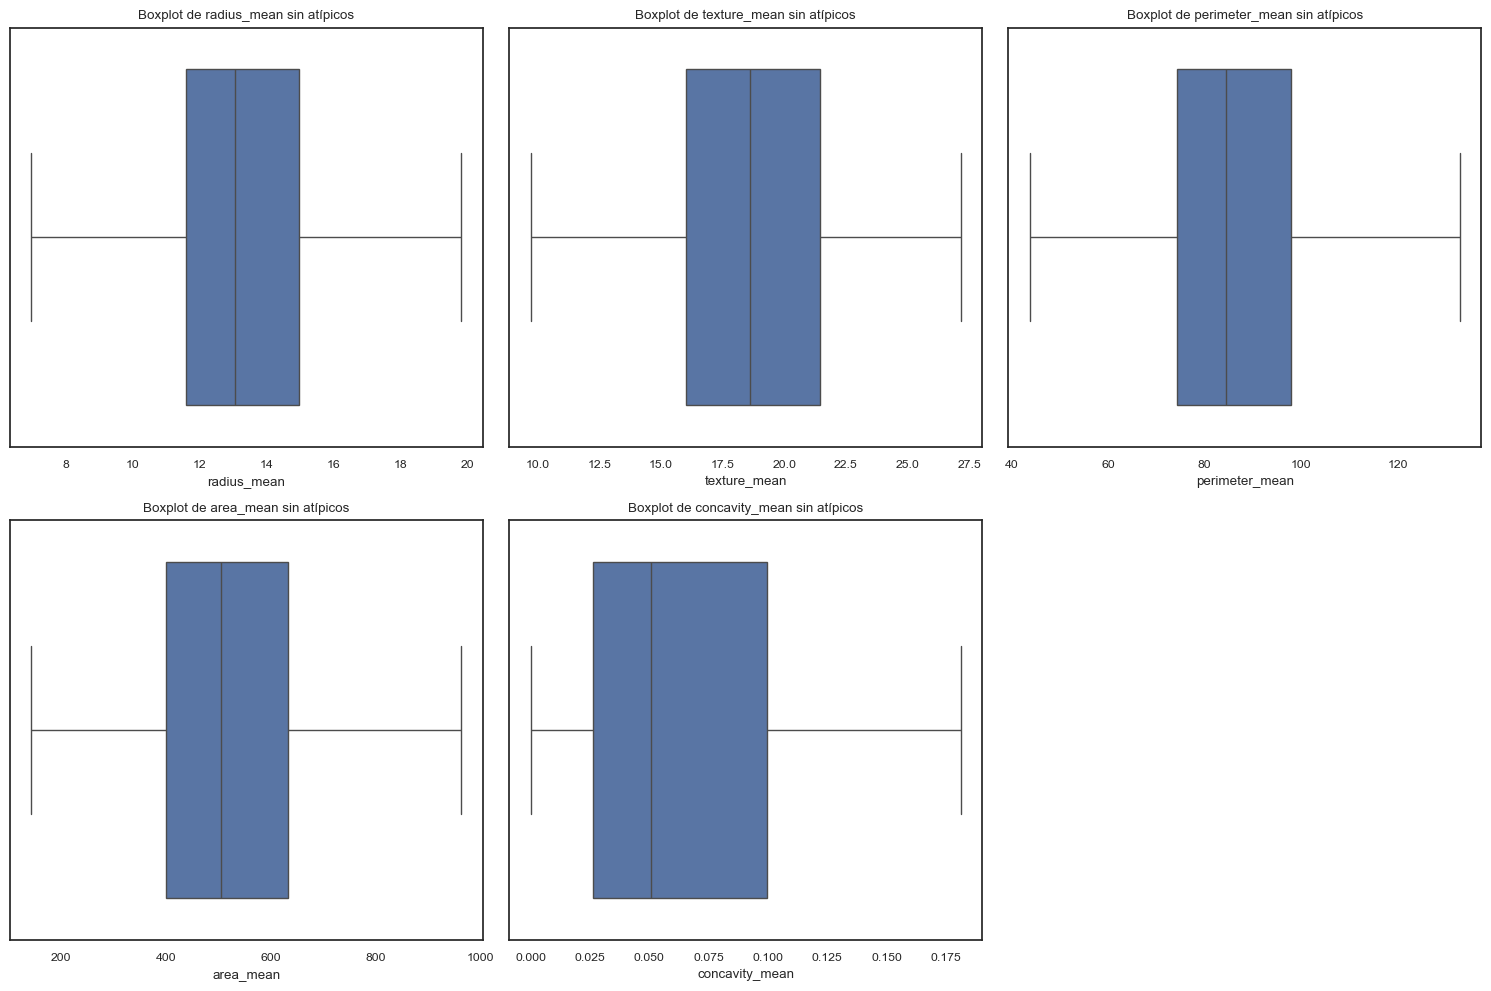

In [10]:
#Definición de factores para limites superior e inferior
limits = {feature: [1.5, 1.5] for feature in features}
limits = {
    'radius_mean': [1, 1.5],
    'texture_mean': [1, 1.5],
    'perimeter_mean': [1, 1.5],
    'area_mean': [0.5, 1.5],
    'concavity_mean': [0.5, 1.5]
}
#Espacio para los boxplot
plt.figure(figsize=(15, 10))
# Iterar sobre cada característica y aplicar los límites
for i, (key, values) in enumerate(limits.items(), 1):
    Q1 = data[key].quantile(0.25)
    Q3 = data[key].quantile(0.75)
    IQR = Q3 - Q1  # rango intercuartil
    limite_superior = Q3 + values[0] * IQR
    limite_inferior = Q1 - values[1] * IQR
    # Filtrar los datos para quitar los valores atípicos
    filtered_df = data[(data[key] >= limite_inferior) & (data[key] <= limite_superior)]
    # Crear el boxplot
    plt.subplot(2, 3, i)
    sns.boxplot(x=filtered_df[key])
    plt.title(f'Boxplot de {key} sin atípicos')
    plt.xlabel(key)
plt.tight_layout()
plt.show()
plt.close()


## 6. Algoritmos de clasificación

### 6.1. Logistic Regression

In [11]:

#Elimina columnas con NaN
columns_with_nan = data.columns[data.isnull().any()]
data.drop(columns_with_nan, axis=1, inplace=True)
# Carga el conjunto de datos Breast Cancer
##dataset = load_breast_cancer()
##X = dataset.data # 569x30
##y = dataset.target # 569x1
# Separar la primera columna en y y las columnas restantes en X
y = data.iloc[:, 0]    # Todas las filas, primera columna
X = data.iloc[:, 1:]   # Todas las filas, de la segunda columna hasta el final
##print (y)
##print (X)

#### 6.1.1. Dividir conjunto de datos y entranemiento

In [12]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6.1.2. Normalizar Data

In [13]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6.1.3. Crear y entrenar modelo REGRESION LOGISTICA

In [14]:
# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

/home/walmache/MEGA/autoCapacitacion/Maestria-IA/gitHub/MaestriaIA-UHE/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [15]:
# Imprime los coeficientes y el intercepto del modelo entrenado
print("\nCoeficientes del modelo:")
print(model.coef_)
print("\nIntercepto del modelo:")
print(model.intercept_)


Coeficientes del modelo:
[[ 0.43190368  0.38732553  0.39343248  0.46521006  0.07166728 -0.54016395
   0.8014581   1.11980408 -0.23611852 -0.07592093  1.26817815 -0.18887738
   0.61058302  0.9071857   0.31330675 -0.68249145 -0.17527452  0.3112999
  -0.50042502 -0.61622993  0.87984024  1.35060559  0.58945273  0.84184594
   0.54416967 -0.01611019  0.94305313  0.77821726  1.20820031  0.15741387]]

Intercepto del modelo:
[-0.44558453]


#### 6.1.4. Predicciones

In [16]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

#### 6.1.5. Probabilidades a etiquetas binarias

In [17]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

#### 6.1.5. Informe de evaluación modelo entrenado

In [18]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



6.1.6. Matriz de Confusión

confusion matrix: 
 [[70  1]
 [ 2 41]]


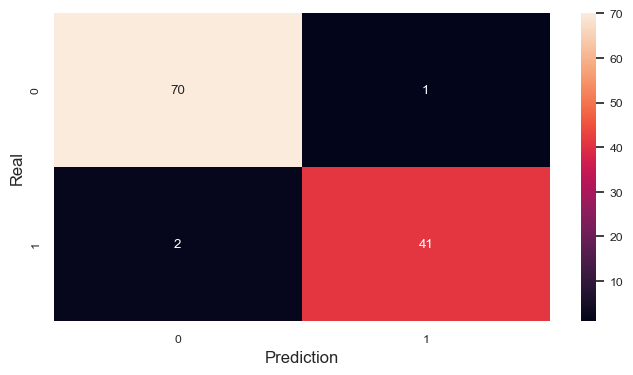

In [19]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.1.7. Metricas varias

accuracy:  0.9736842105263158
recall:  0.9534883720930233
precision:  0.9761904761904762
specificity:  0.9859154929577465
f1 score:  0.9647058823529412
auc:  0.9697019325253848


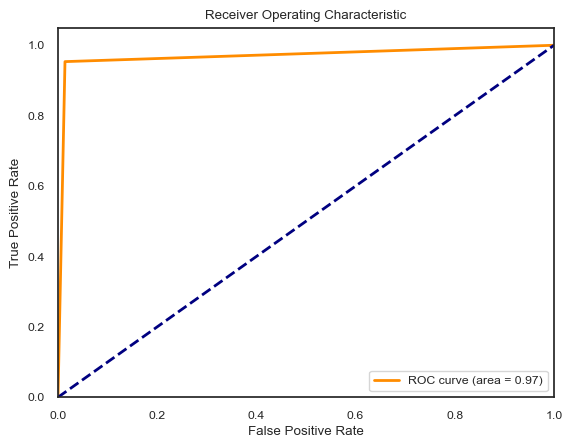

R2:  0.8879790370127743


In [20]:
# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)


# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

#### 6.1.8. Guardar Modelo

In [21]:
# Guardar el modelo a un archivo
##import joblib
joblib.dump(model, 'cancerMamaModel-LR.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('cancerMamaModel-LR.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

### 6.2. ARBOL DE DECISIONES 

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Crea y entrena el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=4, criterion = 'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### 6.2.1. Predicciones

In [23]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

#### 6.2.2. Convertir probabilidades en label binaries

In [24]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

#### 6.2.3. Informe de Evaluación

In [25]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 6.2.4. Matriz de Confusión

confusion matrix: 
 [[68  3]
 [ 3 40]]


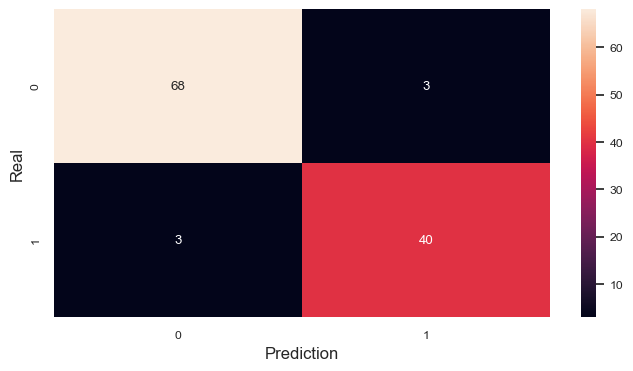

In [26]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.2.5. Metricas

accuracy:  0.9473684210526315
recall:  0.9302325581395349
specificity:  0.9859154929577465
f1 score:  0.9302325581395349
auc:  0.9439895185063871


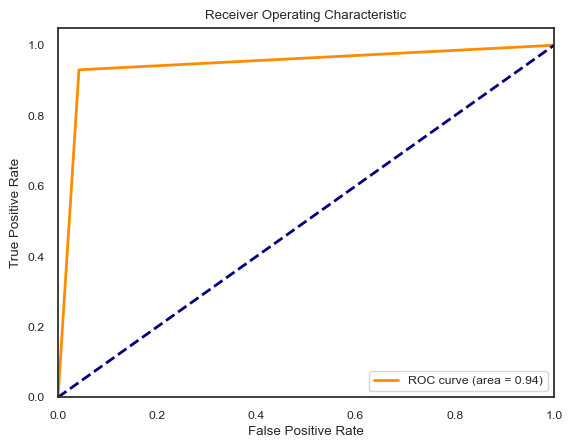

R2:  0.7759580740255486


In [27]:
# Exactitud:
###from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
###from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
###specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
###from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
###from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
###from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
###from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

#### 6.2.3. Gráfico del árbol de decisiones

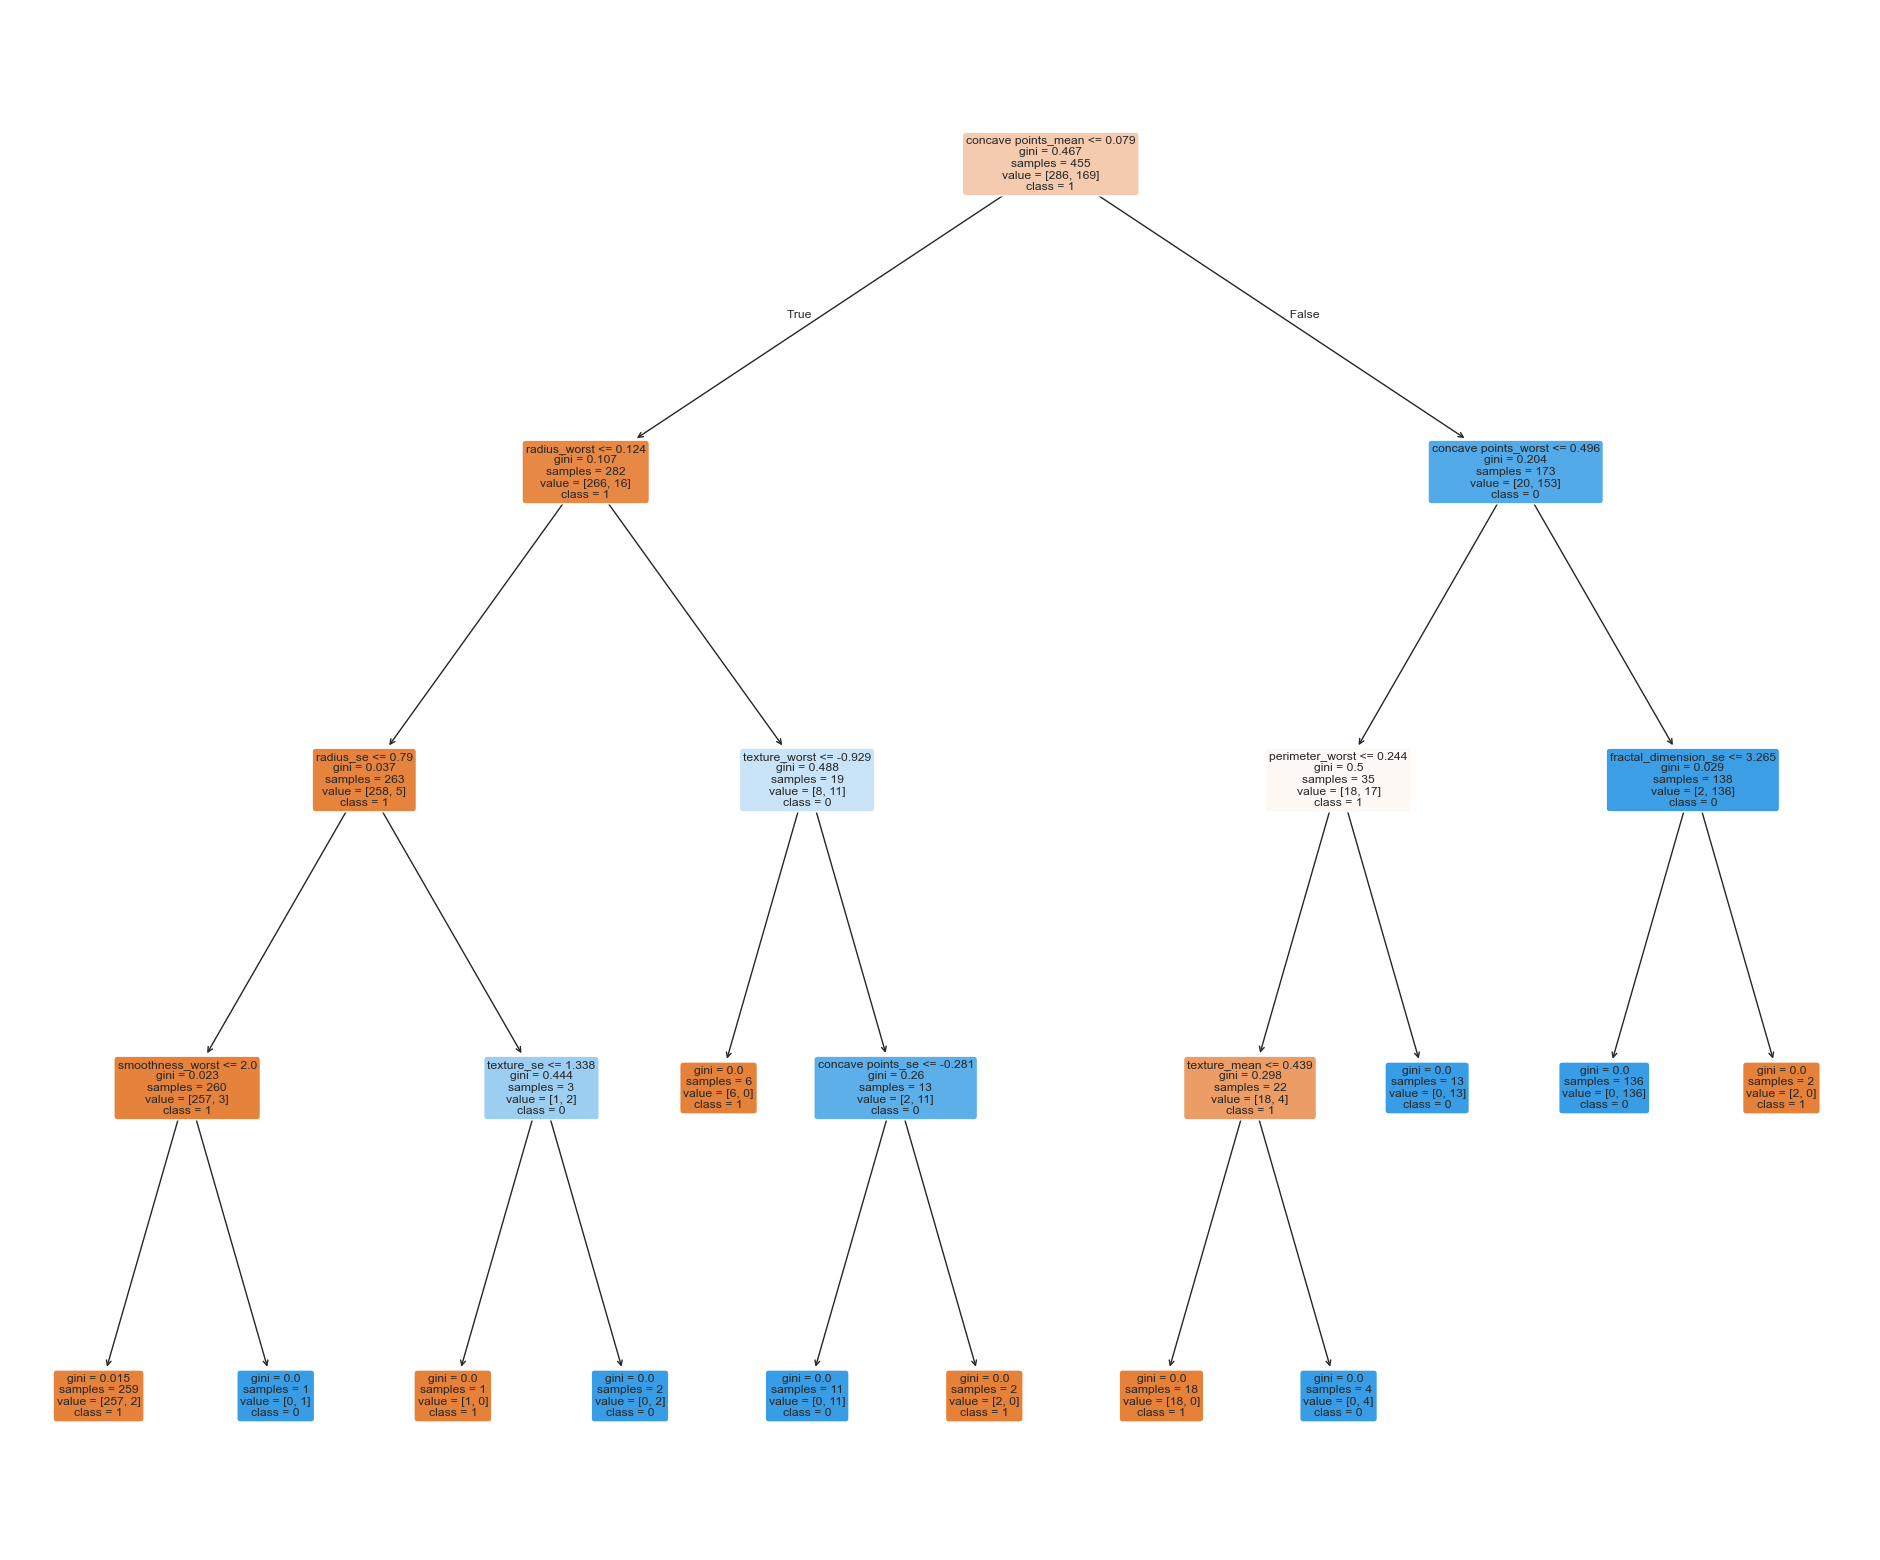

In [33]:
# Visualizar un árbol de decisión usando matplotlib
from sklearn.tree import plot_tree
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(24, 20))
# Dibujar el árbol de decisión
# Obtener los nombres de las características
feature_names = X.columns.tolist()
# Obtener los nombres de las clases (asumiendo que y contiene valores numéricos y necesitas los nombres)
class_names = y.unique().astype(str).tolist()

plot_tree(model, 
                feature_names = feature_names, 
                class_names = class_names, 
                filled=True, 
                rounded=True, 
                ax=ax)
# Mostrar la gráfica
plt.show()

#### 6.2.4 Importancia de las características

                   Variable  Importancia
7       concave points_mean     0.704583
27     concave points_worst     0.066901
20             radius_worst     0.053295
22          perimeter_worst     0.052474
1              texture_mean     0.031395
21            texture_worst     0.028196
19     fractal_dimension_se     0.018908
17        concave points_se     0.016234
10                radius_se     0.012211
24         smoothness_worst     0.009409
11               texture_se     0.006395
0               radius_mean     0.000000
23               area_worst     0.000000
25        compactness_worst     0.000000
26          concavity_worst     0.000000
28           symmetry_worst     0.000000
18              symmetry_se     0.000000
15           compactness_se     0.000000
16             concavity_se     0.000000
14            smoothness_se     0.000000
13                  area_se     0.000000
12             perimeter_se     0.000000
9    fractal_dimension_mean     0.000000
8             sy

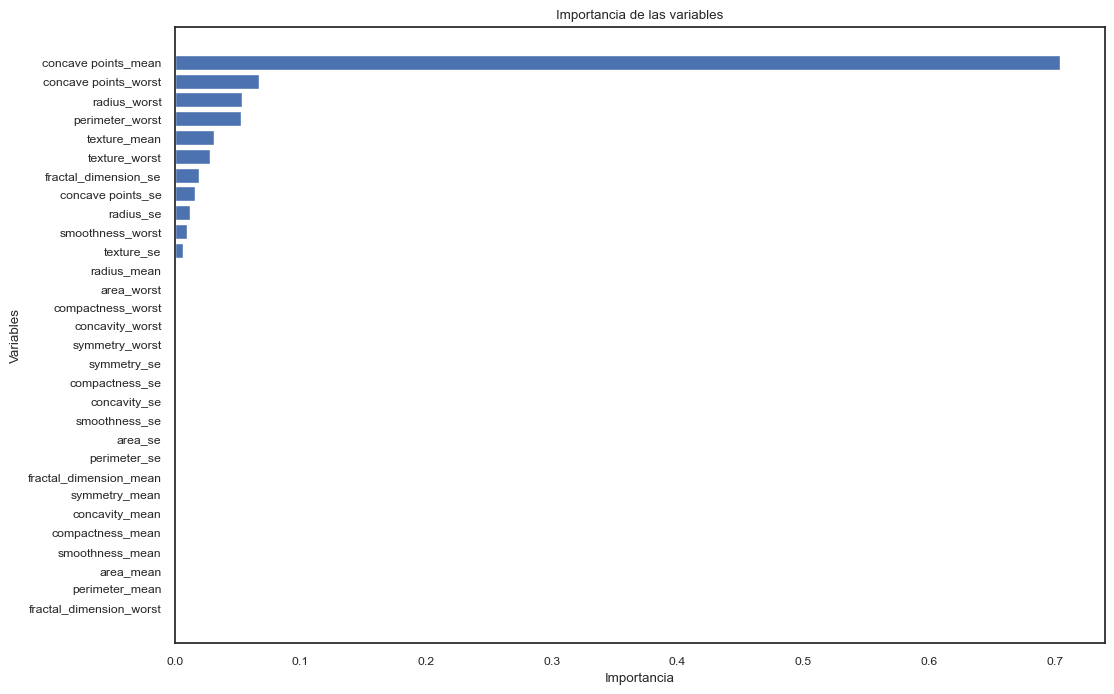

In [35]:
# Calcular y visualizar la importancia de las variables en la predicción del modelo
importances = model.feature_importances_
# Crear un DataFrame para visualizar las importancias
import pandas as pd
feature_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feature_importances)

# Visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.gca().invert_yaxis()
plt.show()

#### 6.2.5. Guardar Modelo

In [36]:
# Guardar el modelo a un archivo
###import joblib
joblib.dump(model, 'cancerMamaModel-DT.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('cancerMamaModel-DT.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)